# unit 1.6 - learning curve fitting

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/16-curve-fit.ipynb)

In this example we try to find a polynomial to fit a formula - like a Taylor expansion.

let us try to learn a function of the form $y = a + b * x + c * x^2 + d * x^3$

Inspired by [this example](https://vamsibrp.github.io/pytorch-learning-tutorial/).

In [95]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import math

x = torch.linspace(-math.pi, math.pi, 100) # 1000 equally spaced points between -pi and pi
y = 1/2*x+1 # a simple linear function - this is the data to fit!

# a 4th order polynomial: y = a + b x + c x^2 + d x^3
p = torch.tensor([1,2,3,4]) # powers of x
xx = x.unsqueeze(-1).pow(p) # x^1, x^2, x^3, x^4
# we need to find the coefficients a, b, c, d

# defining the model that will fit the data
class myModel(torch.nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.linear1 = torch.nn.Linear(p.shape[0], 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.flatten(x)
        return x
    

model = myModel()
loss_func = torch.nn.MSELoss(reduction='sum')
optimiser = torch.optim.Adam(model.parameters())

for t in range(1,10001):
    y_pred = model(xx)
    loss = loss_func(y_pred,y)
    if t%1000 == 0:
        print(t,loss.item())
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

1000 21.213972091674805
2000 14.561162948608398
3000 9.453557968139648
4000 6.3931660652160645
5000 4.1160149574279785
6000 2.072017192840576
7000 0.6690644025802612
8000 0.10340999811887741
9000 0.004682127386331558
10000 2.7003976356354542e-05


learned parameters a,b,c,d: tensor([[ 5.0000e-01,  5.9624e-04,  9.9281e-08, -6.1821e-05]]) tensor([0.9992])


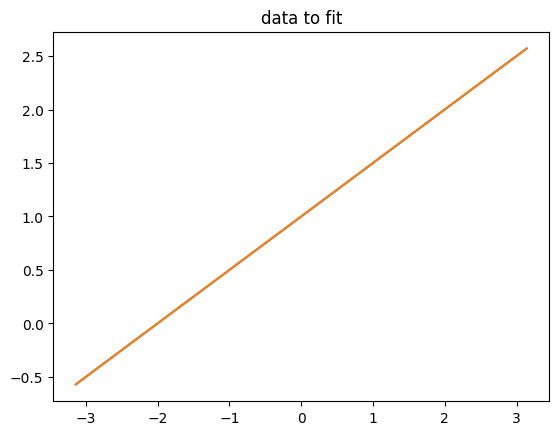

In [102]:
abcd = model.linear1.weight.detach()
bias = model.linear1.bias.detach()
print("learned parameters a,b,c,d:", abcd, bias)

y_pred = (xx*abcd).sum(1).add(bias) # predictor function
plt.plot(x, y, x, y_pred)
plt.title('data to fit')
plt.show()

it found coefficient of the polynomial $y = a + b * x + c * x^2 + d * x^3$

In this case b = 0.5, rest are 0
The bias was 1, so a = 1

This is basically a model of the line: $y = 1 + 0.5*x$

## next step

Now we can do the same thing but for a more complex nonlinear function - sin(x)

In [105]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import math

x = torch.linspace(-math.pi, math.pi, 100) # 100 equally spaced points between -pi and pi
y = torch.sin(x) # this is the data to fit!

# a 4th order polynomial: y = a + b x + c x^2 + d x^3
p = torch.tensor([1,2,3,4]) # powers of x
xx = x.unsqueeze(-1).pow(p) # x^1, x^2, x^3, x^4
# we need to find the coefficients a, b, c, d

# defining the model that will fit the data
class myModel(torch.nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.linear1 = torch.nn.Linear(p.shape[0], 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.flatten(x)
        return x

# training the model
learning_rate = 1e-3
model = myModel()
loss_func = torch.nn.MSELoss(reduction='sum')
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)  # optim

for t in range(1,10001):
    y_pred = model(xx)
    loss = loss_func(y_pred,y)
    if t%1000 == 0:
        print(t,loss.item())
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

1000 13.873600006103516
2000 6.289536476135254
3000 1.936378836631775
4000 0.707927405834198
5000 0.5570642352104187
6000 0.5141518115997314
7000 0.4871659576892853
8000 0.47716638445854187
9000 0.4756455421447754
10000 0.4755881130695343


learned parameters a,b,c,d: tensor([[ 8.5221e-01,  5.5493e-05, -9.2267e-02, -5.7784e-06]]) tensor([-7.5010e-05])


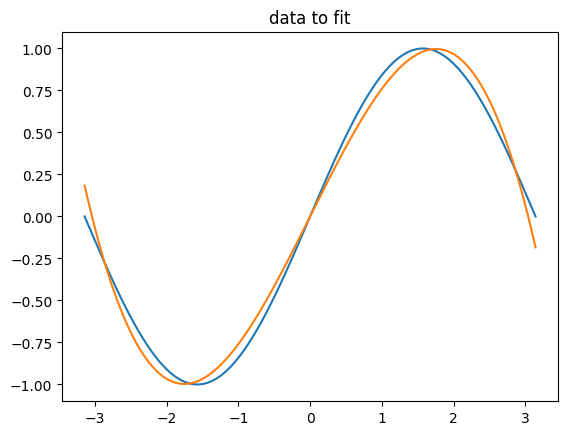

In [106]:
abcd = model.linear1.weight.detach()
bias = model.linear1.bias.detach()
print("learned parameters a,b,c,d:", abcd, bias)

y_pred = (xx*abcd).sum(1).add(bias) # predictor function
plt.plot(x, y, x, y_pred)
plt.title('data to fit')
plt.show()